## News Mood

In this assignment, you'll create a Python script to perform a sentiment analysis of the Twitter activity of various news oulets, and to present your findings visually.

Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: __BBC, CBS, CNN, Fox, and New York times__.

![output_10_0.png](output_10_0.png)

![output_13_1.png](output_13_1.png)

The first plot will be and/or feature the following:

* Be a scatter plot of sentiments of the last __100__ tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
* Each plot point will reflect the _compound_ sentiment of a tweet.
* Sort each plot point by its relative timestamp.

The second plot will be a bar plot visualizing the _overall_ sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

The tools of the trade you will need for your task as a data analyst include the following: tweepy, pandas, matplotlib, seaborn, textblob, and VADER.

Your final Jupyter notebook must:

* Pull last 100 tweets from each outlet.
* Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet. 
* Pull into a DataFrame the tweet's source acount, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
* Export the data in the DataFrame into a CSV file.
* Save PNG images for each plot.

As final considerations:

* Use the Matplotlib and Seaborn libraries.
* Include a written description of three observable trends based on the data. 
* Include proper labeling of your plots, including plot titles (with date of analysis) and axes labels.
* Include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.  


In [156]:
# Dependencies
import tweepy
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import time

In [157]:
# Twitter API Keys
consumer_key = "IqqOcoOSlCxcEUAuZQY1Kb02L"
consumer_secret = "4ISKPBgy56BXsp7a8Ja639ToJ9xhjeAya13yg3bRU7wnfkL9f3"
access_token = "922955283172876289-OK82xypOTTZsmZnsG2sxZxjVC9wlymW"
access_token_secret = "zyJNP5AaGcAuKuKiNEWiUwiBccWdEWrMawvksujYJigq3"

In [158]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [159]:
# Target Search Term
news_outlet = ["@BBC", "@CBS", "@CNN", "@Fox", "@nytimes"]
counter = 1
sentiments =[]

In [160]:
for outlet in news_outlet:
    public_tweets = api.user_timeline(outlet, count=100)
    tweetnumber = 1       
    for tweet in public_tweets:
        print("Tweet %s: %s" % (counter, tweet["text"]))
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = tweetnumber
        sentiments.append({"Media Source": outlet,
                           "Text":tweet["text"],
                           "Date": tweet["created_at"],
                           "Compound": compound,
                           "Positive": pos,
                           "Neutral": neu,
                           "Negative": neg,
                           "Tweet Count": tweetnumber})
        tweetnumber +=1
        counter +=1


Tweet 1: RT @BBCOne: Q: How many tickles does it take to make a squid laugh?
A: Ten tickles. 

#BluePlanet2 https://t.co/fhKPOUBp5U
Tweet 2: RT @bbcstrictly: That shock result has left us spinning. RT to show your love for @AstonMerrygold and @JManrara 💖 https://t.co/KJVszLhB2k
Tweet 3: RT @BBCTwo: Well, you don't see that every day... #RobotWars https://t.co/sLq92M7mqY
Tweet 4: RT @BBCOne: Can’t beat a good accessory. 👑 #BluePlanet2 https://t.co/mRZZEdwmlO
Tweet 5: RT @BBCPanorama: Watch our #paradisepapers investigation into the offshore secrets of the rich &amp; famous on iPlayer.  https://t.co/MIH4CMbhZ…
Tweet 6: RT @BBCBreaking: At least 27 people killed in Texas church shooting, police commissioner in Sutherland Springs tells US media https://t.co/…
Tweet 7: 🎥 @LouisTheroux meets disaffected former members of the Church of Scientology. #MyScientologyMovie. Tonight at 9pm… https://t.co/5hRLxriwiW
Tweet 8: When your other half cheats on you with #StrangerThings. 😡 Via @BBCTheSocial

Tweet 101: Get ready for football! Stream NFL on CBS today w/ #CBSAllAccess (not available on mobile phones). Try 1 week FREE:… https://t.co/BJOWnqgBgc
Tweet 102: Stream the LSU Tigers at Alabama Crimson Tide LIVE tonight at 8PM ET! Try #CBSAllAccess FREE:… https://t.co/L2k6pXwRIp
Tweet 103: Stream the South Carolina Gamecocks at Georgia Bulldogs LIVE today at 3:30PM ET! Try #CBSAllAccess FREE:… https://t.co/f3nZLlh7Vv
Tweet 104: Stream the season premiere of #LifeInPieces tonight at 9:30/8:30c with a FREE trial of #CBSAllAccess:… https://t.co/FMHinKs6si
Tweet 105: RT @swatcbs: .@ShemarMoore takes command tonight on the series premiere of #SWAT at 10/9c on @CBS &amp; CBS All Access: https://t.co/ANyt4qF6iF…
Tweet 106: It's almost time! Stream the series premiere of #SWAT tonight at 10/9c with a FREE trial of #CBSAllAccess:… https://t.co/lpPKp9ayTJ
Tweet 107: RT @CBSThisMorning: Listen to @IainLoveTheatre chat w/ @Mistahwax about making @YoungSheldonCBS his own + his love for Broadway &

Tweet 201: Texas Gov. Greg Abbot releases a statement on the shooting at First Baptist Church in Sutherland Springs… https://t.co/TiwNGu2Pht
Tweet 202: Sutherland Springs business owner on church shooting: "It's just awful...there were emergency responders everywhere" https://t.co/TYcC5jCX9m
Tweet 203: ISIS claims responsibility for a suicide attack in Yemen https://t.co/9ScXiQp7Sl https://t.co/cmAG9lNdTJ
Tweet 204: Sutherland Springs resident on church shooting: "It's just awful...there were emergency responders everywhere" https://t.co/TYcC5jCX9m
Tweet 205: Law enforcement have reported multiple victims at a Texas church, but have not said how many https://t.co/PGxqFieLyc https://t.co/pLNO4vE3sT
Tweet 206: President Trump tweets support for people of Sutherland Springs, Texas, after church shooting… https://t.co/muJFcRBDWB
Tweet 207: One suspect dead after reported shooting in Sutherland Springs, Texas, says Guadalupe Co. Sheriff's Office official… https://t.co/s8KvNZh8t6
Tweet 208: 

Tweet 301: RT @aprilwensel: "We only hire senior devs" screams, "We don't believe in a growth mindset."
Tweet 302: Wow, Lightroom CC is such an improvement from previous editions, wonderfully easy to use 📸 https://t.co/TR7cDgaUUM
Tweet 303: Ugly Christmas apparel with Australiana themes and proceeds going to the Cancer Council, what else would I want. https://t.co/iYTEENq1cl
Tweet 304: @kaibrach Same. Also having such a great camera in my pocket at all times really convinces my inner photographer.
Tweet 305: Twitter furthers exclusion of anyone but straight white men with blocking content on bisexuality. https://t.co/20RWMlyrQJ
Tweet 306: Anger management goals: Uma Thurman. https://t.co/GewteyOqt2
Tweet 307: RT @zeigenvector: @digitalocean If you know of any cool companies in NYC (maybe remote?) looking to hire an engineer who &lt;3's JavaScript &amp;…
Tweet 308: RT @jenbrea: It's the height of privilege to be able to look away from pain, whoever's pain it is.
Tweet 309: RT @rubberban

Tweet 401: Conan O’Brien may be taking more artistic risks than any other late-night host https://t.co/4shU1bgOCo
Tweet 402: RT @arappeport: I.R.S. commissioner, demonized by conservatives, leaves on his terms w/ no apologies. “Survival is its own reward.” https:/…
Tweet 403: Democrats argue that the wave of retirements will help them retake the House https://t.co/IzVkertrVt
Tweet 404: He kept crime rates low in his first term. Now, Mayor de Blasio has a plan to make police officers nicer. https://t.co/9W1fI7EGcw
Tweet 405: We used VR to explore what music feels like to a deaf person https://t.co/ApNIF1loo1
Tweet 406: More than 20 people were killed after a gunman walked into a church in a rural town 30 miles east of San Antonio https://t.co/eL5QUzCWv6
Tweet 407: When behavior goes unseen or ignored by employers, “whisper networks” can provide women with vital support systems https://t.co/4V2qikUqdq
Tweet 408: “There’s a public perception... that Canada is a steward of the environment,

In [161]:
sentiments_df=pd.DataFrame.from_dict(sentiments)#check
# sentiments_df["User"].describe()

In [162]:
# cols = list(sentiments_df.columns.values)#check
# print (cols)

In [163]:
sentiments_csv= sentiments_df[['Media Source','Date','Text','Compound','Positive','Neutral','Negative','Tweet Count']]#restuctur
sentiments_csv.head()#check

,Media Source,Date,Text,Compound,Positive,Neutral,Negative,Tweet Count
0,@BBC,Sun Nov 05 20:49:53 +0000 2017,RT @BBCOne: Q: How many tickles does it take t...,0.5574,0.175,0.825,0.000,1
1,@BBC,Sun Nov 05 20:47:59 +0000 2017,RT @bbcstrictly: That shock result has left us...,0.3818,0.176,0.714,0.109,2
2,@BBC,Sun Nov 05 20:46:18 +0000 2017,"RT @BBCTwo: Well, you don't see that every day...",0.2732,0.174,0.826,0.000,3
3,@BBC,Sun Nov 05 20:46:10 +0000 2017,RT @BBCOne: Can’t beat a good accessory. 👑 #Bl...,0.4404,0.293,0.707,0.000,4
4,@BBC,Sun Nov 05 20:46:01 +0000 2017,RT @BBCPanorama: Watch our #paradisepapers inv...,0.5574,0.175,0.825,0.000,5


In [164]:
sentiments_csv['Media Source'] = sentiments_csv['Media Source'].map(lambda x: x.lstrip('@'))
sentiments_csv.head()#check

,Media Source,Date,Text,Compound,Positive,Neutral,Negative,Tweet Count
0,BBC,Sun Nov 05 20:49:53 +0000 2017,RT @BBCOne: Q: How many tickles does it take t...,0.5574,0.175,0.825,0.000,1
1,BBC,Sun Nov 05 20:47:59 +0000 2017,RT @bbcstrictly: That shock result has left us...,0.3818,0.176,0.714,0.109,2
2,BBC,Sun Nov 05 20:46:18 +0000 2017,"RT @BBCTwo: Well, you don't see that every day...",0.2732,0.174,0.826,0.000,3
3,BBC,Sun Nov 05 20:46:10 +0000 2017,RT @BBCOne: Can’t beat a good accessory. 👑 #Bl...,0.4404,0.293,0.707,0.000,4
4,BBC,Sun Nov 05 20:46:01 +0000 2017,RT @BBCPanorama: Watch our #paradisepapers inv...,0.5574,0.175,0.825,0.000,5


In [165]:
sentiments_csv.to_csv("News Mood Tweets.csv")

In [166]:
# colors
news_colors={"BBC": "lightblue",
             "CBS":"green", 
             "CNN":"red",
             "Fox":"blue",
             "nytimes": "yellow"}

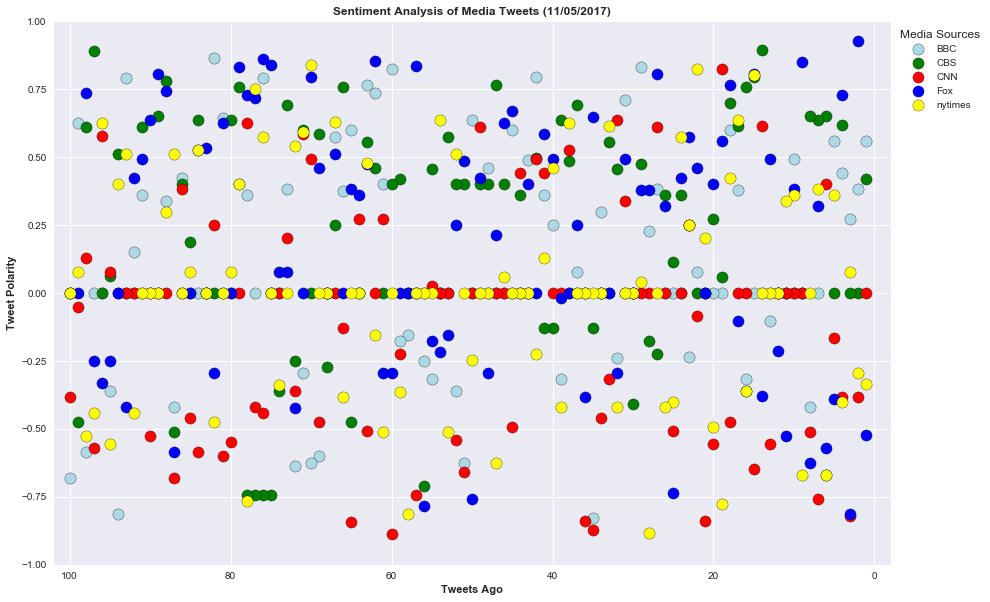

In [167]:
#First Plot
sns.set()
plt.figure(figsize = (15,10))
plt.xlabel("Tweets Ago",fontweight='bold')
plt.ylabel("Tweet Polarity",fontweight='bold')
plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%m/%d/%Y")),fontweight='bold')
plt.xlim(102,-2, -1)
plt.ylim(-1,1)
for newsoutlet in news_colors.keys():
    df = sentiments_csv[sentiments_csv['Media Source'] == newsoutlet]
    sentiment_analysis = plt.scatter(df["Tweet Count"],df["Compound"], label = newsoutlet, color = news_colors[newsoutlet], edgecolor = "black", s=125)
plt.legend(bbox_to_anchor = (1,1), title = 'Media Sources')    
plt.show()
sentiment_analysis.figure.savefig('SentimentAnalysis.png')    

In [168]:
scoresbyoutlet=sentiments_csv.groupby("Media Source")["Compound"].mean()
scoresbyoutlet#check

Media Source
BBC        0.102408
CBS        0.203394
CNN       -0.102392
Fox        0.179426
nytimes    0.022659
Name: Compound, dtype: float64

In [169]:
sentiments_csv.head()#check

,Media Source,Date,Text,Compound,Positive,Neutral,Negative,Tweet Count
0,BBC,Sun Nov 05 20:49:53 +0000 2017,RT @BBCOne: Q: How many tickles does it take t...,0.5574,0.175,0.825,0.000,1
1,BBC,Sun Nov 05 20:47:59 +0000 2017,RT @bbcstrictly: That shock result has left us...,0.3818,0.176,0.714,0.109,2
2,BBC,Sun Nov 05 20:46:18 +0000 2017,"RT @BBCTwo: Well, you don't see that every day...",0.2732,0.174,0.826,0.000,3
3,BBC,Sun Nov 05 20:46:10 +0000 2017,RT @BBCOne: Can’t beat a good accessory. 👑 #Bl...,0.4404,0.293,0.707,0.000,4
4,BBC,Sun Nov 05 20:46:01 +0000 2017,RT @BBCPanorama: Watch our #paradisepapers inv...,0.5574,0.175,0.825,0.000,5


In [170]:
x_axis=np.arange(len(scoresbyoutlet))
# x_axis.head()

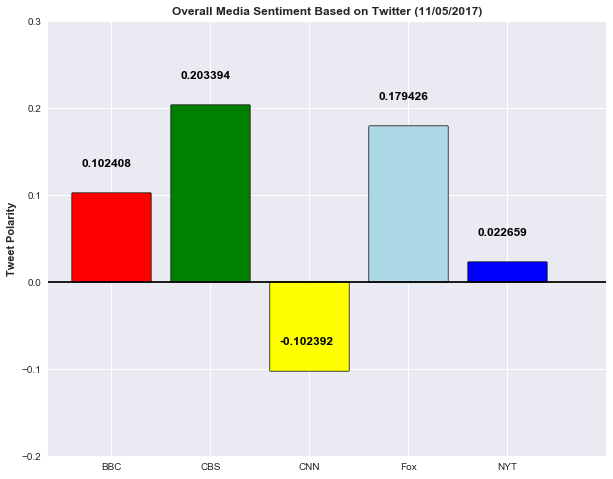

In [171]:
# Create bar chart
sns.set()

plt.figure(figsize = (10,8))
for newsoutlet in news_colors.keys():
    df = sentiments_csv[sentiments_csv['Media Source'] == newsoutlet]
#     print (news_colors[newsoutlet])
   
    overall_media_sentiment = plt.bar(x_axis,scoresbyoutlet, color = {"lightblue","green", "yellow", "red", "blue"}, label = newsoutlet, edgecolor = "black")
    
# plt.bar(x_axis,scoresbyoutlet, label = newsoutlet, color = news_colors[newsoutlet], edgecolor = "black")
plt.ylim(-.2, .3)
plt.ylabel("Tweet Polarity",fontweight='bold')
plt.axhline(y=0, color = 'black') #adds a horizontal line at zero
for i, v in enumerate(scoresbyoutlet):
    plt.text(i-.3, v+.03, str(v).format(), color='black', fontweight='bold')
plt.title("Overall Media Sentiment Based on Twitter (%s)" % (time.strftime("%m/%d/%Y")),fontweight='bold')
x_labels = ["BBC", "CBS", "CNN", "Fox", "NYT"]
x_locations = [value for value in np.arange(6)]#tick locations
plt.xticks(x_locations, x_labels)
plt.show()
plt.savefig('Overall Media Sentiment Based on Twitter.png')

3 Observations:
>Employing Sentiment Analysis CNN was the only news source that had a negative sentiment for the date of November 5th, 2017

>Employing Sentiment Analysis CBS was the most positive out of the group

>Employng Sentiment Analysis the New York Times was closest to Neutral in their sentiment